## Problem statement 
UrbanCartCo. 2014-2018 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budget. Use these insights to optimize pricing, promotions and market expansion for suitable growth and reduced concentration risk. 

In [1]:
# importing libaries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
sheets = pd.read_excel(r'C:\Users\Tushar\Downloads\Regional Sales Dataset.xlsx', sheet_name = None)

In [3]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [4]:
# Assign dataframe to different sheets 
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [5]:
shape_list = [df_sales, df_customers, df_products, df_regions, df_state_reg]
x = [ 'sales', 'customers', 'products', 'regions', 'state_reg']
for shapes in range  (len(shape_list)):
    print (f'df_{x[shapes]}:{shape_list[shapes].shape}')
    print()
    print(f'{shape_list[shapes].head()}')

df_sales:(64104, 12)

    OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  
0               6      2499

In [6]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [7]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header 
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [8]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [9]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [10]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [11]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [12]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

## Data Cleaning and wrangling 

In [13]:
# Merge with Customers
df = df_sales.merge(df_customers,
                    how='left',
                    left_on='Customer Name Index',
                    right_on='Customer Index')

In [14]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [15]:
#Merge with Products 
df= df.merge(df_products,
             how='left',
             left_on='Product Description Index',
             right_on='Index')

In [16]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [17]:
#Merge with Regions 
df= df.merge(df_regions,
             how='left',
             left_on='Delivery Region Index',
             right_on='id')

In [18]:
#Merge with Budget
df= df.merge(
    df_budgets,
    how='left',
    on ='Product Name')

In [19]:
df = df.merge(df_state_reg[["State Code","Region"]],
              how='left',
              left_on = 'state_code',
              right_on = 'State Code')

In [20]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,964940.231,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,1085037.329,CT,Northeast


In [21]:
# Customer Index 
# Index 
# state Code 

# Clean up Redundant Columns 
Cols_to_drop = ['Customer Index', 'Index', 'id']
df = df.drop(columns = Cols_to_drop, errors = 'ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,964940.231,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,1085037.329,CT,Northeast


In [22]:
# convert all columns to lower case for consistency and easier access 
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone',
       '2017 budgets', 'state code', 'region'], dtype=object)

In [23]:
df.head()


,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,area_code,population,households,median_income,land_area,water_area,time_zone,2017 budgets,state code,region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,964940.231,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,1085037.329,CT,Northeast


In [24]:
# Keep The Important  Columns and Delete The Columns That We Dont Need 

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]
    
    

In [25]:
df = df [cols_to_keep]

In [26]:
df.head()


,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [27]:
# rename the columns 
df = df.rename(columns ={'ordernumber':'order_number',
                         'orderdate' :'order_date',
                         'customer names':'customer_name',
                         'product name' : 'product_name',
                         'order quantity': 'order_quantity',
                         'unit price' : 'unit_price',
                         'total_unit_cost': 'cost',
                         'state_code': 'state',
                         'state':'state_name',
                         'latitude':'lat',
                         'longitude': 'lon',
                         '2017 budgets' : 'budgets',
                         'line total' : 'revenue'
                        })
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [28]:
# Blank out budgets for non - 2017 orders 
df.loc[df['order_date'].dt.year != 2017,'budgets'] = pd.NA

# Line Total is revenue 
df[['order_date','product_name','revenue', 'budgets']].head()

,order_date,product_name,revenue,budgets
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [29]:
df


,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,NaN
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,NaN
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,NaN
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,NaN


In [30]:
# line total is revenue 
df.to_csv('final.csv')

In [31]:
## Filter the dataset to include only records from year 2017 
df_2017 = df[df['order_date'].dt.year == 2017]


In [32]:
df.isnull().sum()

order_number           0
order_date             0
customer_name          0
channel                0
product_name           0
order_quantity         0
unit_price             0
revenue                0
total unit cost        0
state                  0
county                 0
state_name             0
region                 0
lat                    0
lon                    0
budgets            48841
dtype: int64

In [33]:
df['total_cost'] =df['order_quantity']*df['total unit cost']

In [34]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budgets,total_cost
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160


In [35]:
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] =df['profit']/df['revenue']*100

In [36]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budgets,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


## Exploratory Data Analytics 

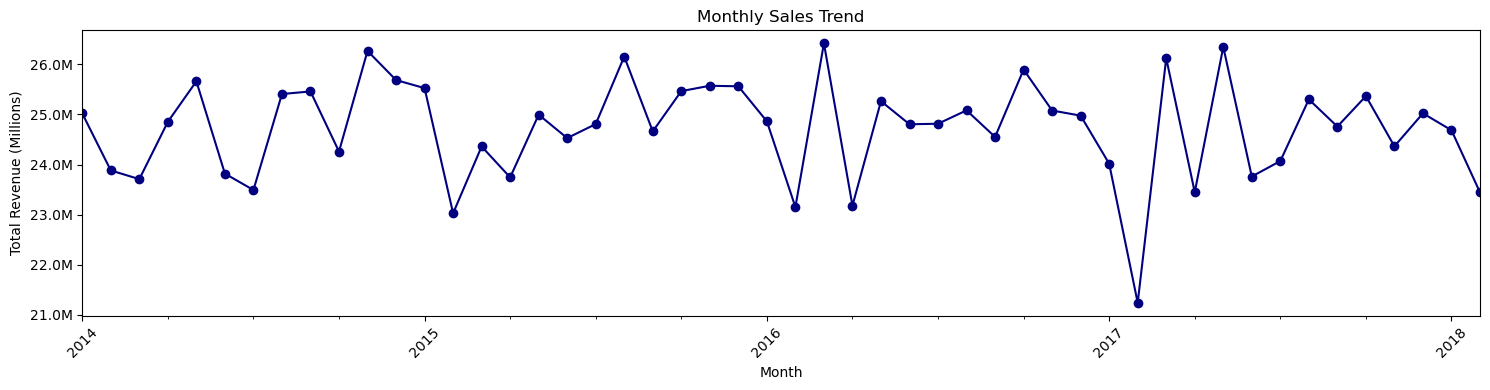

In [37]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize =(15,4))

monthly_sales.plot(marker='o',color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos:f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Tushar\AppData\Local\Temp\ipykernel_7804\3938079611.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='month', y='revenue', palette='Blues_d')


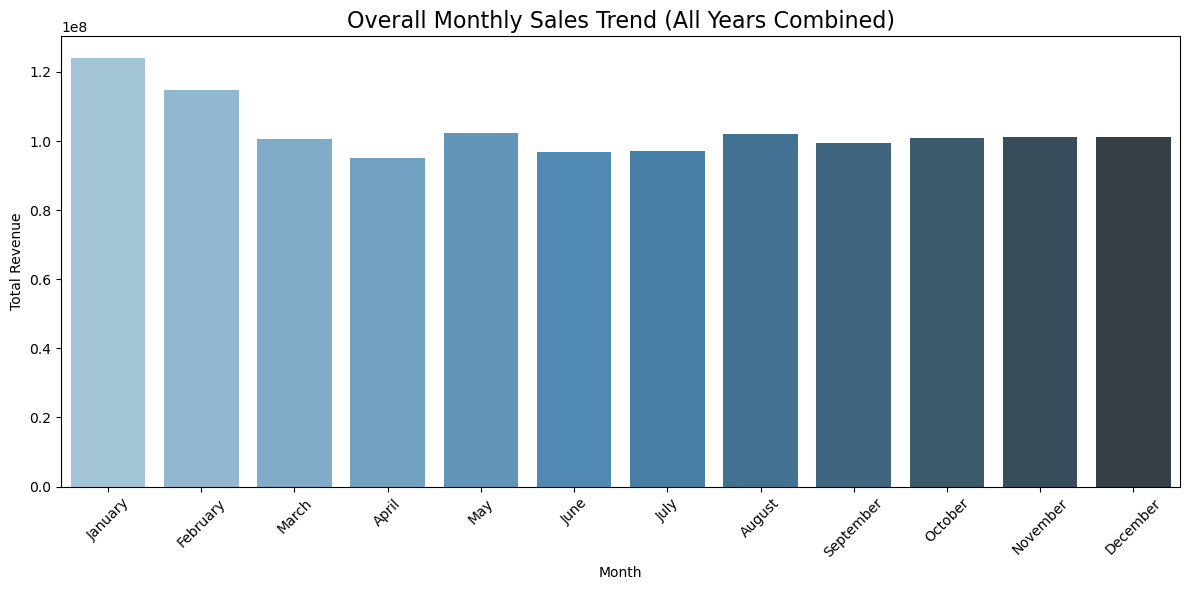

In [38]:

# Assuming your DataFrame is named df
# Step 1: Convert order_date to datetime if not already
df['order_date'] = pd.to_datetime(df['order_date'])

# Step 2: Extract month names
df['month'] = df['order_date'].dt.month_name()

# Step 3: Create month number for sorting later
df['month_num'] = df['order_date'].dt.month

# Step 4: Group by month and sum revenue
monthly_sales = df.groupby(['month_num', 'month'])['revenue'].sum().reset_index()

# Step 5: Sort by month number
monthly_sales = monthly_sales.sort_values('month_num')

# Step 6: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='month', y='revenue', palette='Blues_d')

plt.title('Overall Monthly Sales Trend (All Years Combined)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Tushar\AppData\Local\Temp\ipykernel_7804\105812640.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='revenue', y='product_name', palette='viridis')


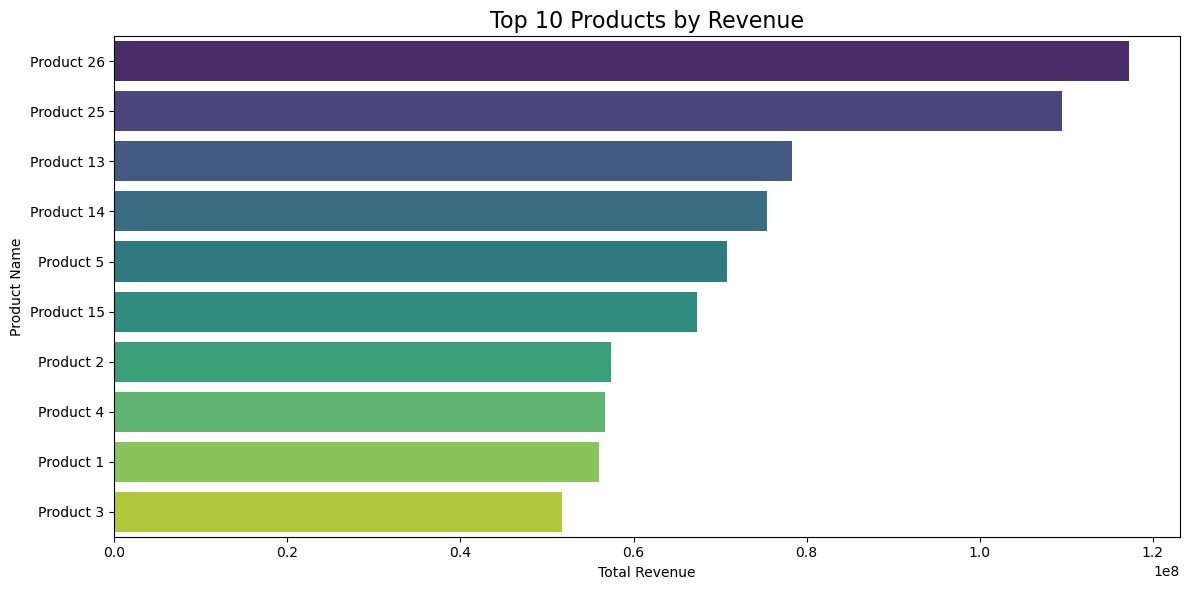

In [39]:


# Assuming your DataFrame is named df

# Step 1: Group by product_name and sum the revenue
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Step 2: Sort by revenue in descending order and take top 10
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Step 3: Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='revenue', y='product_name', palette='viridis')

plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


C:\Users\Tushar\AppData\Local\Temp\ipykernel_7804\2894201982.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_sales, x='channel', y='revenue', palette='Set2')


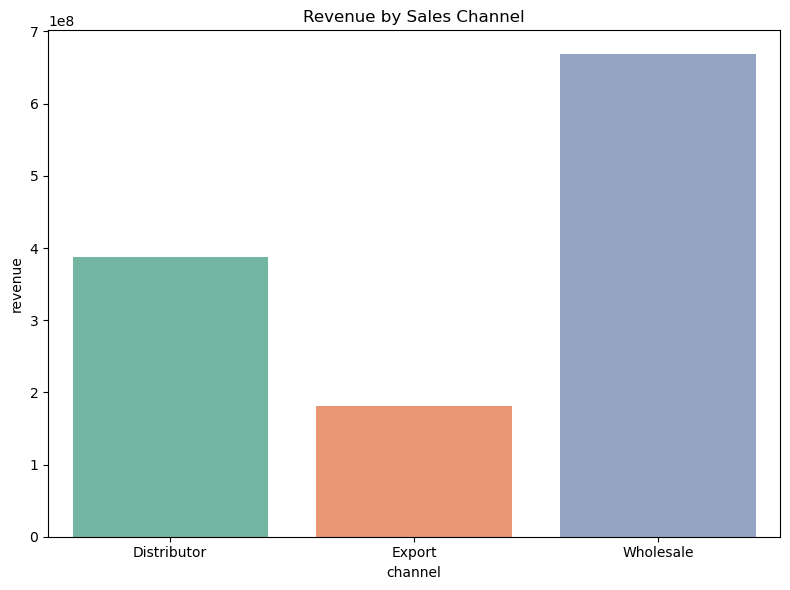

In [40]:
channel_sales = df.groupby('channel')['revenue'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=channel_sales, x='channel', y='revenue', palette='Set2')
plt.title("Revenue by Sales Channel")
plt.tight_layout()
plt.show()


C:\Users\Tushar\AppData\Local\Temp\ipykernel_7804\1010182644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='region', y='revenue', palette='pastel')


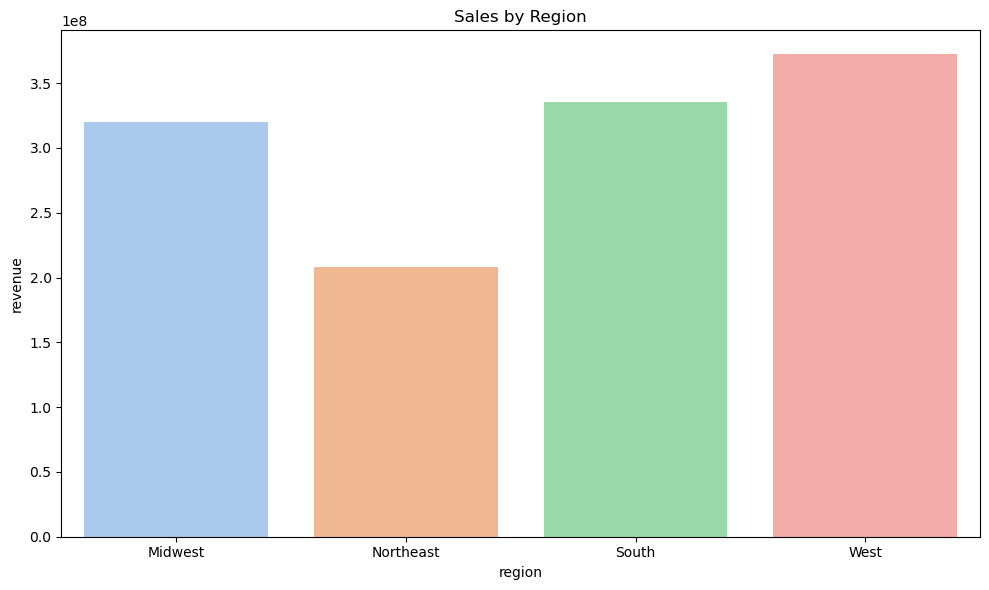

In [41]:
region_sales = df.groupby('region')['revenue'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=region_sales, x='region', y='revenue', palette='pastel')
plt.title("Sales by Region")
plt.tight_layout()
plt.show()


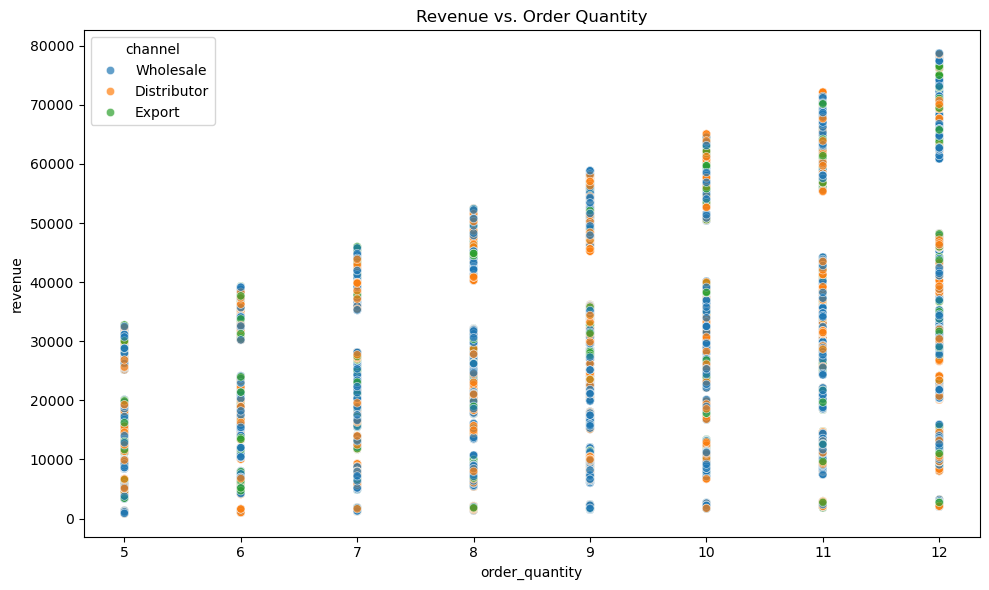

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='order_quantity', y='revenue', hue='channel', alpha=0.7)
plt.title("Revenue vs. Order Quantity")
plt.tight_layout()
plt.show()


C:\Users\Tushar\AppData\Local\Temp\ipykernel_7804\2370482320.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_price, x='product_name', y='unit_price', palette='magma')


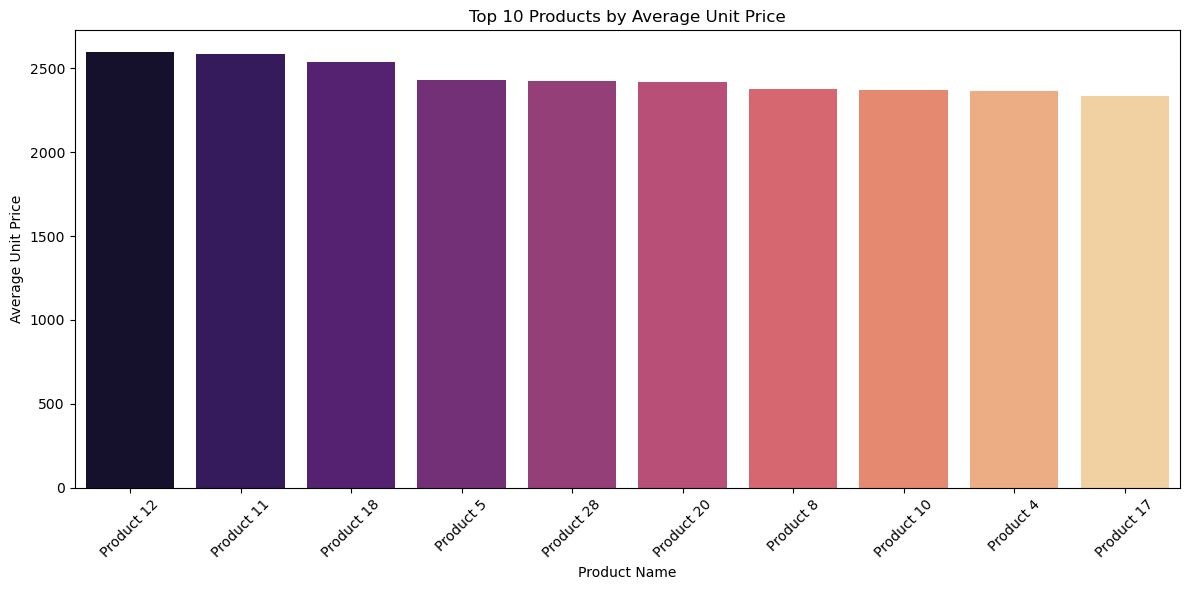

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure unit_price is numeric
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')

# Step 2: Group by product and calculate average unit price
product_price = df.groupby('product_name')['unit_price'].mean().reset_index()

# Step 3: Sort by unit price (optional)
product_price = product_price.sort_values(by='unit_price', ascending=False)

# Optional: limit to top N products by price
top_products_price = product_price.head(10)

# Step 4: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_products_price, x='product_name', y='unit_price', palette='magma')
plt.title('Top 10 Products by Average Unit Price')
plt.xlabel('Product Name')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


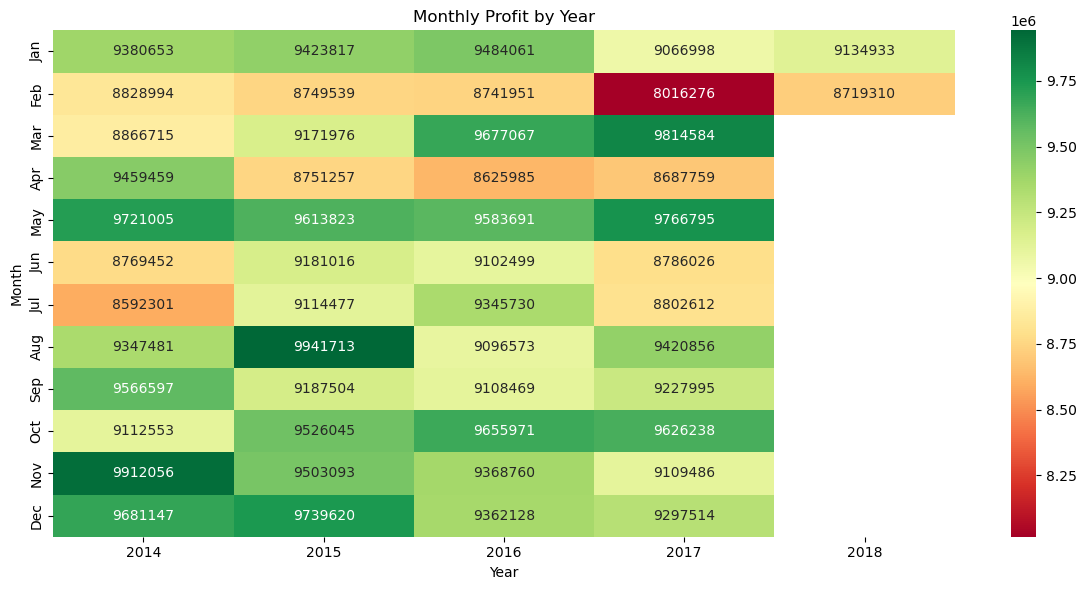

In [44]:
# Convert date
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month and year
df['month'] = df['order_date'].dt.strftime('%b')
df['year'] = df['order_date'].dt.year
df['month_num'] = df['order_date'].dt.month

# Pivot for heatmap
monthly_profit = df.pivot_table(index='month', columns='year', values='profit', aggfunc='sum')

# Reorder months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_profit = monthly_profit.reindex(month_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_profit, annot=True, fmt=".0f", cmap='RdYlGn')
plt.title('Monthly Profit by Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()
